# Single Variate Linear Regression

### Manual Computation

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
data = pd.read_csv('Datasets/height-weight.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [35]:
x = data['Height']
print(type(x))
x = x.values
print(type(x))
y = data['Weight'].values

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [36]:
m_x = np.mean(x)
m_y = np.mean(y)
n = len(x)
num = [(x[i]-m_x)*(y[i]-m_y) for i in range(n)]
den = [(x[i]-m_x)**2 for i in range(n)]
m = sum(num)/sum(den)
c = m_y - (m*m_x)

print(m,c,sep='\n\n')

7.717287640785375

-350.7371918121361


In [37]:
x_comp = x
y_comp = c + m*x_comp

In [38]:
print("Actual Y".center(15,' '),"Predicted Y".center(25,' '),"Difference".center(25,' '))
for i in range(5):
    print("{0}".format(y[i]).center(15,' '),
          "{0}".format(y_comp[i]).center(25,' '),
          "{0}".format(y[i]-y_comp[i]).center(25,' '))

    Actual Y           Predicted Y                Difference       
241.893563180437     219.16147992599963        22.732083254437384   
 162.3104725213     180.0725461908986        -17.762073669598607   
 212.7408555565     221.19180858518723        -8.450953028687223   
220.042470303077     202.83140128138461        17.211069021692396   
206.349800623871     188.56072770273556        17.789072921135443   


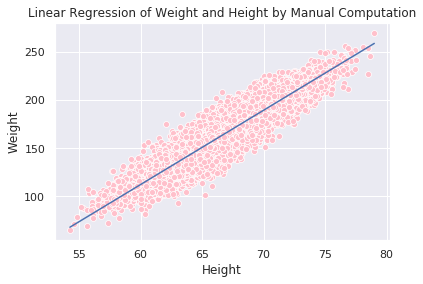

In [39]:
df = pd.DataFrame({'height':x,'weight':y})
df_comp = pd.DataFrame({'height':x_comp,'weight':y_comp})
sns.set()
sns.scatterplot(x="height", y="weight", data=df,color='pink')
sns.lineplot(x="height", y="weight", data=df_comp)
plt.title('Linear Regression of Weight and Height by Manual Computation')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

## Using Linear Regression Model of Sklearn

In [40]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)
yPrediction = linearRegressor.predict(xTest)

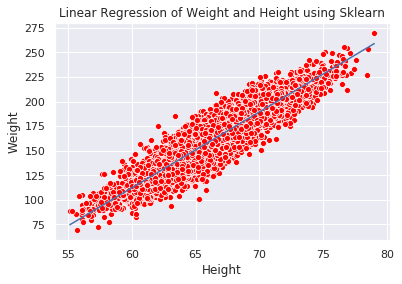

In [41]:
df_train = pd.DataFrame({'height':xTrain.ravel(),'weight':yTrain.ravel()})
df_test = pd.DataFrame({'height':xTrain.ravel(),'weight':linearRegressor.predict(xTrain).ravel()})
sns.set()
sns.scatterplot(x="height", y="weight", data=df_train,color='red')
sns.lineplot(x="height", y="weight", data=df_test)
plt.title('Linear Regression of Weight and Height using Sklearn')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()